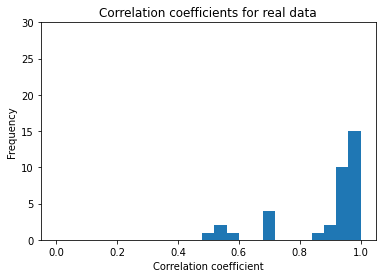

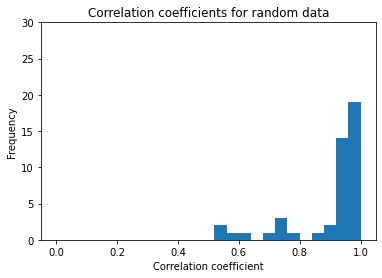

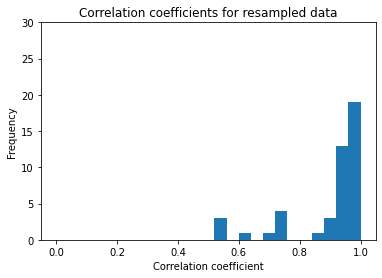

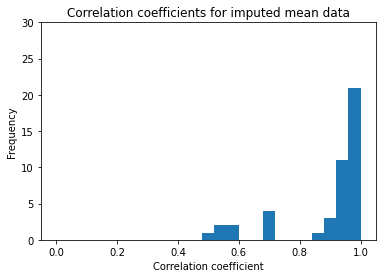

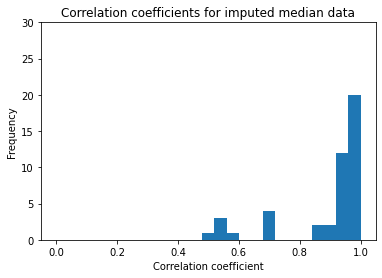

[0.7087193033942764,
 0.5346578827803705,
 0.7016677215866706,
 0.5148398976657957,
 0.7015175917594976,
 0.5890041581233687,
 0.5207522686866458,
 0.6906250507355443,
 0.5286285528398534,
 0.9680453246640824,
 0.9992608076263333,
 0.9549357409445656,
 0.9898327715865722,
 0.9845777256019056,
 0.9513274712763653,
 0.9384615474129894,
 0.9644759465085658,
 0.9704407762492773,
 0.994296505801266,
 0.9633577146108984,
 0.9956829599444713,
 0.9635109285646946,
 0.8926880416477906,
 0.9993680133185614,
 0.9581331537220281,
 0.9897591880776274,
 0.9853194685379991,
 0.9541050870211027,
 0.9345271198008046,
 0.9668632746991017,
 0.9561337678937121,
 0.9854346837579783,
 0.951104307704527,
 0.866710833856714,
 0.9957206267904386,
 0.9780088802066869,
 0.9633068990084939,
 0.9522975025740795,
 0.9584421948693326,
 0.9671293862107209,
 0.9143738334835293,
 0.9940883252075297,
 0.9392379968247372,
 0.9547774066970769,
 0.8789807393495589]

In [1]:
from Helper_Functions import *
from Create_Fake_Data import *
from copy import deepcopy

file_name = "Data/34647699.csv"
plot_top = 80 # ensures all the graphs are scaled the same
data = pd.read_csv(file_name, na_values=['-', 'ND'], header=[0])

# generate the fake data columns
random_data = generate_random(deepcopy(data))
resampled_data = generate_resampled(deepcopy(data))
imputed_mean_data = generate_imputed_mean(deepcopy(data))
imputed_median_data = generate_imputed_median(deepcopy(data))

# analyze correlation coefficients and generate graphs for each data set
analyze_correlation(data, False, "real", plot_top, graph=True)
analyze_correlation(random_data, False, "random", plot_top, graph=True)
analyze_correlation(resampled_data, False, "resampled", plot_top, graph=True)
analyze_correlation(imputed_mean_data, False,  "imputed mean", plot_top, graph=True)
analyze_correlation(imputed_median_data, False, "imputed median", plot_top, graph=True)
